# Prepare Data



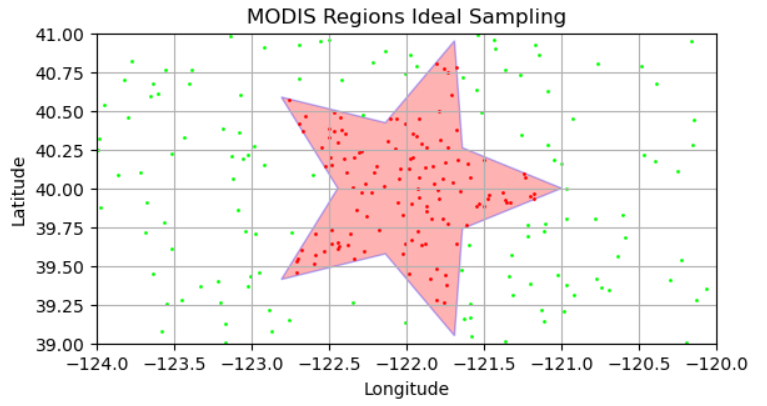
Take syntheitcally generated images and seed them to skew the class data slightly to ensure model can converge

In [ ]:
from PIL import Image
import os

try:
    os.makedirs('data/colorEnhanced/train/NoFire')
    os.makedirs('data/colorEnhanced/val/NoFire')
    os.makedirs('data/colorEnhanced/train/Fire')
    os.makedirs('data/colorEnhanced/val/Fire')
except:
    print("folder already exist")

perc = .05
print("percent to change Fire", perc)

def shiftIm(fldrIn, fn, fldrOut, perc=-.04, type='png'):
    path = fldrIn + fn
    im = Image.open(path).convert('RGB')

    # Split into 3 channels
    r, g, b = im.split()
    # Increase Reds
    r = r.point(lambda i: i * (1+perc))

    # Decrease Greens
    g = g.point(lambda i: i * (1-perc))

    # Recombine back to RGB image
    result = Image.merge('RGB', (r, g, b))

    result.save(f'{fldrOut}/{fn}')
    im.close()
# cropIm(fldrIn, fn, fldrOut)

import glob
FireList = []
NoFireList = []

fldrIn = "data/synthetic/train/Fire/"
fldrOut = "data/colorEnhanced/train/Fire/"
for fire, fn in enumerate(glob.glob(fldrIn+"*.png")):
    fn_trunc = fn.split('/')[-1]
    FireList.append(fn_trunc)
    shiftIm(fldrIn, fn_trunc, fldrOut, perc, 'png')
print("completed train set")
fldrIn = "data/synthetic/val/Fire/"
fldrOut = "data/colorEnhanced/val/Fire/"
for fire, fn in enumerate(glob.glob(fldrIn+"*.png")):
    fn_trunc = fn.split('/')[-1]
    FireList.append(fn_trunc)
    shiftIm(fldrIn, fn_trunc, fldrOut, perc, 'png')
print("completed val set")

perc = -1 * perc
print("percent to change NoFire", perc)

fldrIn = "data/synthetic/train/NoFire/"
fldrOut = "data/colorEnhanced/train/NoFire"
for fire, fn in enumerate(glob.glob(fldrIn+"*.png")):
    fn_trunc = fn.split('/')[-1]
    FireList.append(fn_trunc)
    shiftIm(fldrIn, fn_trunc, fldrOut, perc, 'png')
print("completed train set")
fldrIn = "data/synthetic/val/NoFire/"
fldrOut = "data/colorEnhanced/val/NoFire/"
for fire, fn in enumerate(glob.glob(fldrIn+"*.png")):
    fn_trunc = fn.split('/')[-1]
    FireList.append(fn_trunc)
    shiftIm(fldrIn, fn_trunc, fldrOut, perc, 'png')
print("completed val set")

print("done")


## Notices and Disclaimers

Intel technologies may require enabled hardware, software or service activation.

No product or component can be absolutely secure. 

Your costs and results may vary. 

© Intel Corporation. Intel, the Intel logo, and other Intel marks are trademarks of Intel Corporation or its subsidiaries. Other names and brands may be claimed as the property of others. 